In [2]:
import pints
import pints.toy
import matplotlib.pyplot as plt
import numpy as np

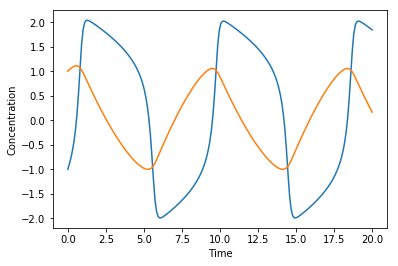

In [3]:
model = pints.toy.FitzhughNagumoModel()
times = np.linspace(0, 20, 200)
values = model.simulate([0.1, 0.1, 3], times)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(times, values)
plt.show()

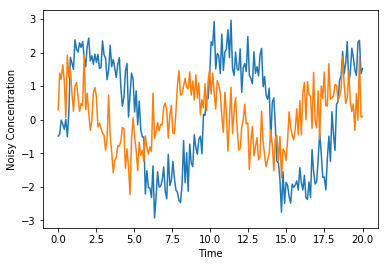

In [4]:
# Define the 'true' parameters
true_parameters = [0.1, 0.1, 3.]

# Run a simulation to get test data
values = model.simulate(true_parameters, times)

# Add some noise
sigma = 0.5
values = values + np.random.randn(values.shape[0],values.shape[1])*sigma

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Noisy Concentration')
plt.plot(times, values)
plt.show()

In [5]:
# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

Minimising error measure
using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 7
Iter. Eval. Best      Time m:s
0     7      945.531    0:00.1
1     14     903.8849   0:00.1
2     21     466.9572   0:00.1
3     28     466.9572   0:00.2
20    147    103.1954   0:01.1
40    287    99.53387   0:02.4
60    427    99.50826   0:03.7
80    567    99.50804   0:05.1
100   707    99.50804   0:06.6
120   847    99.50804   0:08.0
140   987    99.50804   0:09.5
160   1127   99.50804   0:10.8
180   1267   99.50804   0:12.3
200   1407   99.50804   0:13.7
220   1547   99.50804   0:15.3
240   1687   99.50804   0:16.9
260   1827   99.50804   0:18.4
280   1967   99.50804   0:19.9
300   2107   99.50804   0:21.3
320   2247   99.50804   0:22.8
340   2387   99.50804   0:24.2
360   2527   99.50804   0:25.9
380   2667   99.50804   0:27.4
400   2807   99.50804   0:28.9
420   2947   99.50804   0:30.4
440   3087   99.50804   0:31.9
460   3227   99.50804   0:33

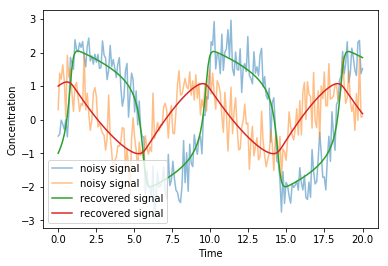

In [6]:
boundaries = pints.RectangularBoundaries([0., 0., 0.], [10., 10., 10.])

# Select a starting point
x0 = [1, 1, 1]

# Perform an optimization
found_parameters, found_value = pints.optimise(score, x0, boundaries=boundaries)
print('Score at true solution:')
print(score(true_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(true_parameters[k]))

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(times, values, alpha=0.5, label='noisy signal')
plt.plot(times, problem.evaluate(found_parameters), label='recovered signal')
plt.legend()
plt.show()

In [7]:
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)
log_prior = pints.UniformLogPrior(
    [0, 0, 0, 0, 0],
    [2, 2, 10, 2, 2]
)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

In [8]:
found_parameters = np.hstack((found_parameters, sigma, sigma))

In [9]:
# Choose starting points for 3 mcmc chains
xs = [
    found_parameters * 1.1,
    found_parameters * 0.9,
    found_parameters * 1.15,
]

# Create mcmc routine
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.AdaptiveCovarianceMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Start adapting after 1000 iterations
mcmc.set_initial_phase_iterations(1000)

# Disable verbose mode
#mcmc.set_log_to_screen(False)

True

In [10]:
# Run!
print('Running...')
chains = mcmc.run()
print('Done!')


Running...
Using Adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0         0          0:00.1
2     9      0         0.333     0          0:00.1
3     12     0.25      0.5       0.25       0:00.1
20    63     0.19      0.19      0.143      0:00.6
40    123    0.0976    0.0976    0.0976     0:01.1
60    183    0.082     0.082     0.0656     0:01.8
80    243    0.0741    0.0617    0.0494     0:02.3
100   303    0.0792    0.0495    0.0396     0:02.8
120   363    0.0661    0.0413    0.0331     0:03.4
140   423    0.0567    0.0355    0.0355     0:03.9
160   483    0.0497    0.0311    0.0435     0:04.5
180   543    0.0442    0.0276    0.0387     0:05.0
200   603    0.039801  0.0249    0.0348     0:05.6
220   663    0.0362    0.0317    0.0317     0:06.2
240   723    0.0332    0.0332    0.0332     0:06.8
260   783    0.0307    0.0345    0.0345   

3100  9303   0.199     0.196     0.193      1:23.9
3120  9363   0.199     0.197     0.193      1:24.6
3140  9423   0.2       0.198     0.194      1:25.6
3160  9483   0.202     0.198     0.195      1:26.8
3180  9543   0.204     0.198     0.196      1:28.3
3200  9603   0.204     0.198     0.197      1:32.4
3220  9663   0.203353  0.198     0.197      1:33.7
3240  9723   0.204     0.198     0.197      1:34.8
3260  9783   0.203     0.198     0.197      1:35.8
3280  9843   0.204206  0.199     0.198      1:36.8
3300  9903   0.205     0.2       0.198      1:37.8
3320  9963   0.205     0.2       0.199      1:40.4
3340  10023  0.205     0.201     0.199      1:43.1
3360  10083  0.205296  0.202     0.2        1:43.7
3380  10143  0.208     0.204     0.202      1:44.3
3400  10203  0.20788   0.204     0.202      1:44.7
3420  10263  0.208     0.205     0.203      1:45.3
3440  10323  0.208079  0.205     0.203      1:45.9
3460  10383  0.209     0.205     0.204      1:46.5
3480  10443  0.208848  0.205688

R-hat:
[1.016594241294132, 1.0524761111488901, 1.0347007988868715, 1.0134580877450381, 1.0209156887892357]


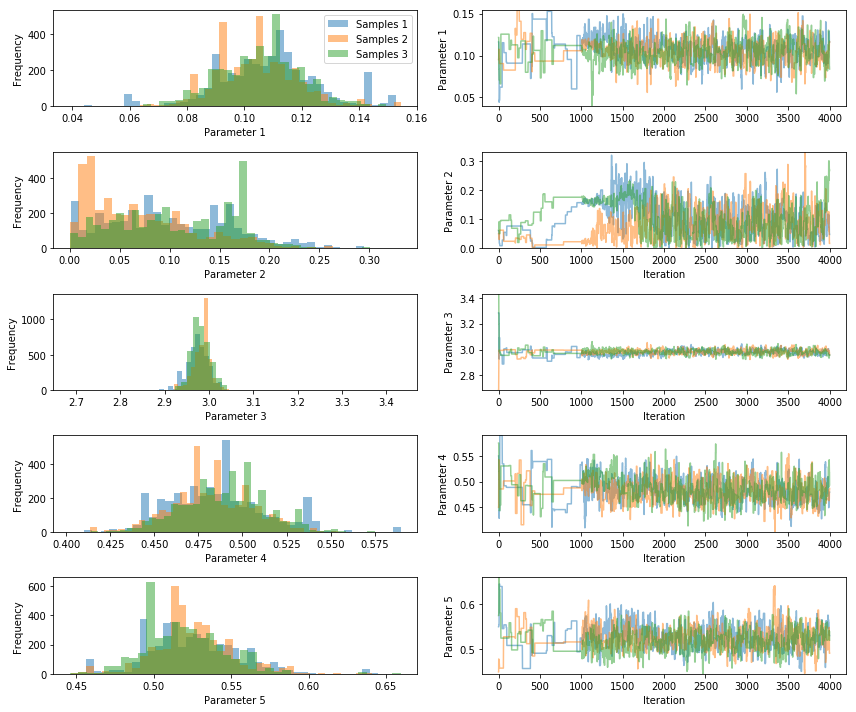

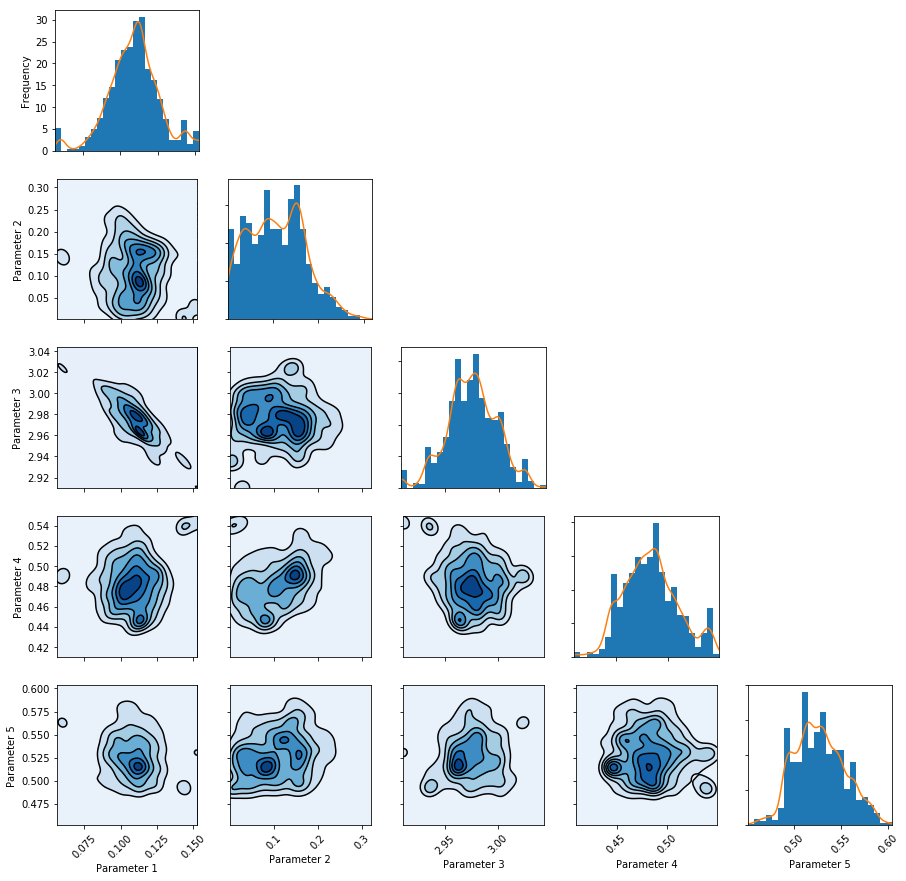

In [11]:
import pints.plot
# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 500:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()